# Chapter 12: Data processing and analysis with pandas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
# pd.set_option('display.mpl_style', 'default')

In [5]:
import matplotlib as mpl
mpl.style.use('ggplot')

In [6]:
import seaborn as sns

## Series object

In [7]:
s = pd.Series([909976, 8615246, 2872086, 2273305])

In [8]:
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [9]:
type(s)

pandas.core.series.Series

In [10]:
s.dtype

dtype('int64')

In [11]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [12]:
s.values

array([ 909976, 8615246, 2872086, 2273305], dtype=int64)

In [13]:
s.index = ["Stockholm", "London", "Rome", "Paris"]

In [14]:
s.name = "Population"

In [15]:
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [16]:
s = pd.Series([909976, 8615246, 2872086, 2273305], 
              index=["Stockholm", "London", "Rome", "Paris"], name="Population")

In [17]:
s["London"]

8615246

In [18]:
s.Stockholm

909976

In [19]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [20]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [21]:
s.min(), s.max()

(909976, 8615246)

In [22]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

In [23]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

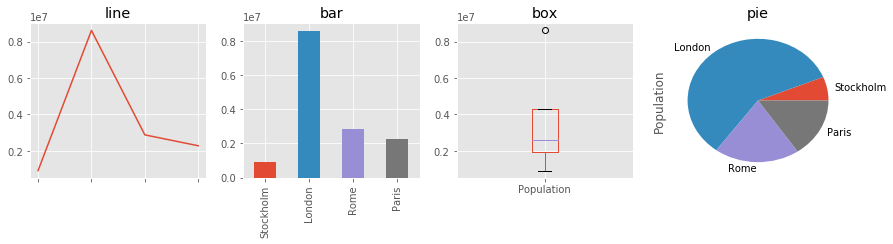

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()
#fig.savefig("ch12-series-plot.pdf")
#fig.savefig("ch12-series-plot.png")

## DataFrame object

In [25]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Sweden", "United kingdom", "Italy", "France"]])

In [26]:
df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sweden,United kingdom,Italy,France


In [27]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]])

In [28]:
df

,0,1
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


In [29]:
df.index = ["Stockholm", "London", "Rome", "Paris"]

In [30]:
df.columns = ["Population", "State"]

In [31]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [32]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]],
                  index=["Stockholm", "London", "Rome", "Paris"],
                  columns=["Population", "State"])

In [33]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [34]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United kingdom", "Italy", "France"]},
                  index=["Stockholm", "London", "Rome", "Paris"])

In [35]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [36]:
df.index

Index(['Stockholm', 'London', 'Rome', 'Paris'], dtype='object')

In [37]:
df.columns

Index(['Population', 'State'], dtype='object')

In [38]:
df.values

array([[909976, 'Sweden'],
       [8615246, 'United kingdom'],
       [2872086, 'Italy'],
       [2273305, 'France']], dtype=object)

In [39]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [40]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [41]:
type(df.Population)

pandas.core.series.Series

In [42]:
df.Population.Stockholm

909976

In [43]:
type(df.index)

pandas.core.indexes.base.Index

In [44]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [45]:
type(df.loc["Stockholm"])

pandas.core.series.Series

In [46]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [47]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [48]:
df.loc["Paris", "Population"]

2273305

In [49]:
df.mean()

Population    3667653.25
dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [51]:
df.dtypes

Population     int64
State         object
dtype: object

In [52]:
df.head()

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


## Larger dataset

In [53]:
df_pop = pd.read_csv("E:\\homework\\NumericalPython\\datasets\\european_cities.csv")

In [54]:
df_pop.head()

,Rank,City,State,Population,Date of census
0,1,London,United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [55]:
df_pop = pd.read_csv("E:\\homework\\NumericalPython\\datasets\\european_cities.csv", delimiter=",", encoding="utf-8", header=0)

In [56]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank              105 non-null int64
City              105 non-null object
State             105 non-null object
Population        105 non-null object
Date of census    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [57]:
df_pop.head()

,Rank,City,State,Population,Date of census
0,1,London,United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [58]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", "")))

In [59]:
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [60]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [61]:
df_pop.head()

,Rank,City,State,Population,Date of census,NumericPopulation
0,1,London,United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [62]:
df_pop.dtypes

Rank                  int64
City                 object
State                object
Population           object
Date of census       object
NumericPopulation     int64
dtype: object

In [63]:
df_pop2 = df_pop.set_index("City")

In [64]:
df_pop2 = df_pop2.sort_index()

In [65]:
df_pop2.head()

,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [66]:
df_pop2.head()

,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [67]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)

In [68]:
df_pop3.head(7)

Rank Population    Date of census  NumericPopulation
State    City                                                          
Austria  Vienna       7  1,794,770    1 January 2015            1794770
Belgium  Antwerp     59    510,610    1 January 2014             510610
         Brussels    16  1,175,831    1 January 2014            1175831
Bulgaria Plovdiv     84    341,041  31 December 2013             341041
         Sofia       14  1,291,895  14 December 2014            1291895
         Varna       85    335,819  31 December 2013             335819
Croatia  Zagreb      24    790,017     31 March 2011             790017

In [69]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [70]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                            53
Population                 528,014
Date of census       31 March 2013
NumericPopulation           528014
Name: (Sweden, Gothenburg), dtype: object

In [71]:
df_pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[False, True]).head()

,Rank,State,Population,Date of census,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [72]:
city_counts = df_pop.State.value_counts()

In [73]:
city_counts.name = "# cities in top 105"

In [74]:
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])

In [75]:
df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation", ascending=False)

In [76]:
df_pop4.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [77]:
df_pop5 = (df_pop.drop("Rank", axis=1)
                 .groupby("State").sum()
                 .sort_values("NumericPopulation", ascending=False))

In [78]:
df_pop5.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


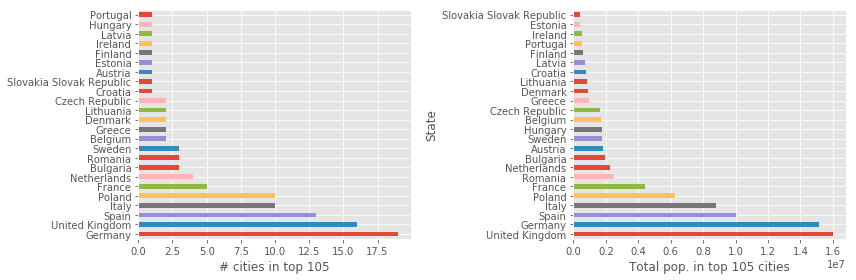

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")

fig.tight_layout()
#fig.savefig("ch12-state-city-counts-sum.pdf")

## Time series

### Basics

In [80]:
import datetime

In [81]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [83]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [84]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))

In [85]:
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int32

In [86]:
ts1["2015-1-3"]

2

In [87]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [88]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [89]:
ts1.index[2].nanosecond

0

In [90]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [91]:
ts2 = pd.Series(np.random.rand(2), 
                index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])

In [92]:
ts2

2015-01-01    0.397155
2015-02-01    0.867412
dtype: float64

In [93]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])

In [94]:
ts3 = pd.Series(np.random.rand(3), periods)

In [95]:
ts3

2015-01    0.738043
2015-02    0.529047
2015-03    0.716346
Freq: M, dtype: float64

In [96]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]', freq='M')

In [97]:
ts2.to_period('M')

2015-01    0.397155
2015-02    0.867412
Freq: M, dtype: float64

In [98]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]', freq='M')

### Temperature time series example

In [99]:
df1 = pd.read_csv('E:\\homework\\NumericalPython\\datasets\\temperature_outdoor_2014.csv', delimiter="\t", names=["time", "outdoor"])

In [100]:
df2 = pd.read_csv('E:\\homework\\NumericalPython\\datasets\\temperature_indoor_2014.csv', delimiter="\t", names=["time", "indoor"])

In [101]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [102]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [103]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [104]:
df1 = df1.set_index("time")

In [105]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [106]:
df2 = df2.set_index("time")

In [107]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [108]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

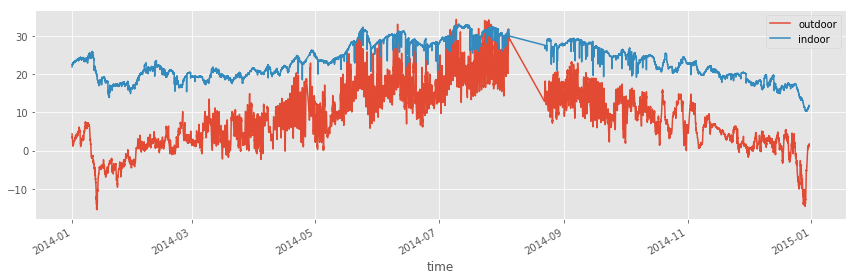

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()
#fig.savefig("ch12-timeseries-temperature-2014.pdf")

In [110]:
# select january data

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


In [112]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [113]:
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [114]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
outdoor    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


In [115]:
df2_jan = df2["2014-1-1":"2014-1-31"]

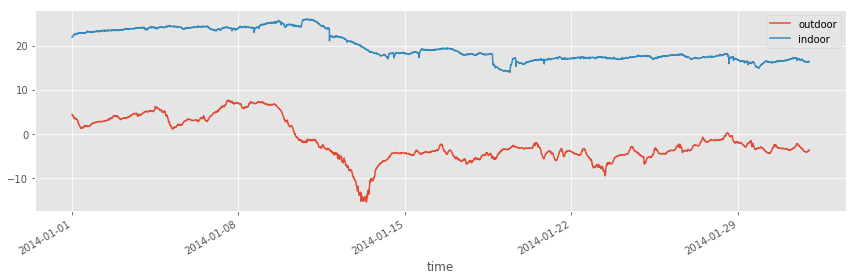

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()
#fig.savefig("ch12-timeseries-selected-month.pdf")

In [117]:
# group by month

In [118]:
df1_month = df1.reset_index()

In [119]:
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [120]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [121]:
df1_month = df1_month.groupby("month").aggregate(np.mean)

In [122]:
df2_month = df2.reset_index()

In [123]:
df2_month["month"] = df2_month.time.apply(lambda x: x.month)

In [124]:
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [125]:
df_month = df1_month.join(df2_month)

In [126]:
df_month.head(3)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [127]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)

In [128]:
df_month.head(3)

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


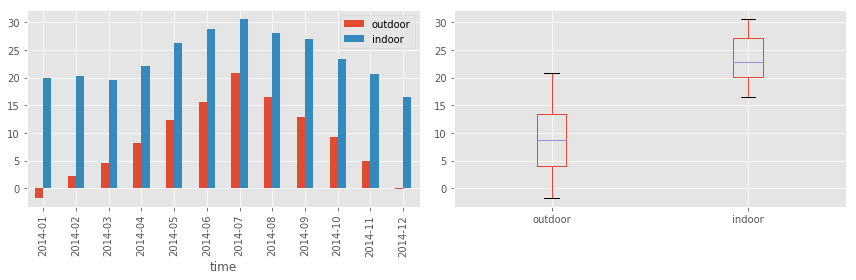

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()
#fig.savefig("ch12-grouped-by-month.pdf")

In [130]:
df_month

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


In [131]:
# resampling

In [132]:
df1_hour = df1.resample("H").mean()

In [133]:
df1_hour.columns = ["outdoor (hourly avg.)"]

In [134]:
df1_day = df1.resample("D").mean()

In [135]:
df1_day.columns = ["outdoor (daily avg.)"]

In [136]:
df1_week = df1.resample("7D").mean()

In [137]:
df1_week.columns = ["outdoor (weekly avg.)"]

In [138]:
df1_month = df1.resample("M").mean()

In [139]:
df1_month.columns = ["outdoor (monthly avg.)"]

In [140]:
# df1.resample("D")

In [141]:
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

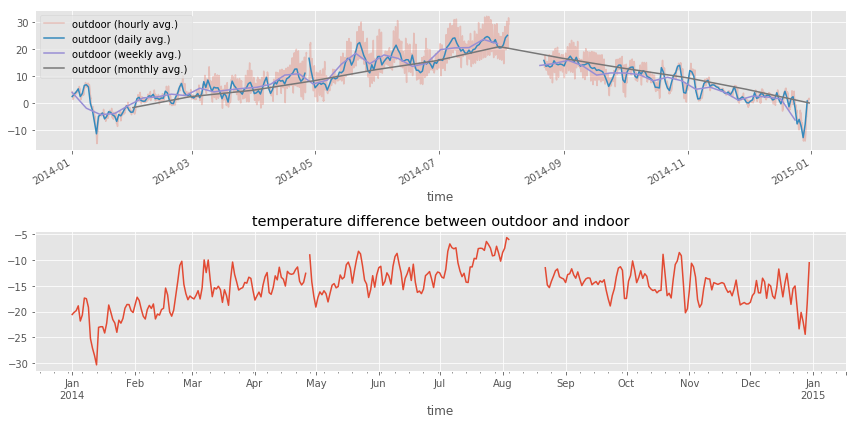

In [142]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()
#fig.savefig("ch12-timeseries-resampled.pdf")

In [143]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
           df1.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
           df1.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})], axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


## Selected day

In [144]:
df1_dec25 = df1[(df1.index < "2014-9-1") & (df1.index >= "2014-8-1")].resample("D")

In [145]:
df1_dec25 = df1.loc["2014-12-25"]

In [146]:
df1_dec25.head(5)

,outdoor
time,
2014-12-25 00:01:45+01:00,-4.88
2014-12-25 00:11:45+01:00,-4.94
2014-12-25 00:21:46+01:00,-5.06
2014-12-25 00:31:47+01:00,-5.06
2014-12-25 00:41:47+01:00,-5.12


In [147]:
df2_dec25 = df2.loc["2014-12-25"]

In [148]:
df2_dec25.head(5)

,indoor
time,
2014-12-25 00:01:45+01:00,16.31
2014-12-25 00:11:45+01:00,16.25
2014-12-25 00:21:46+01:00,16.31
2014-12-25 00:31:47+01:00,16.31
2014-12-25 00:41:47+01:00,16.25


In [149]:
df1_dec25.describe().T

,count,mean,std,min,25%,50%,75%,max
outdoor,144.0,-7.788819,1.456085,-10.06,-9.075,-7.75,-6.8625,-4.88


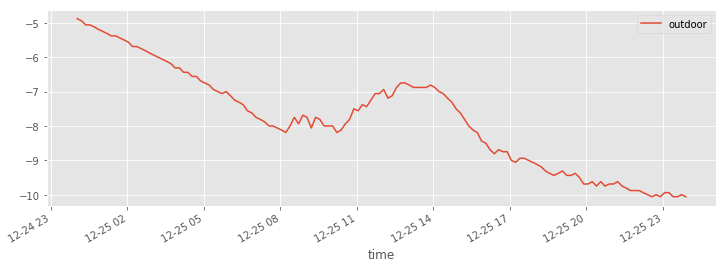

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_dec25.plot(ax=ax)

#fig.savefig("ch12-timeseries-selected-month.pdf")

In [151]:
df1.index

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00',
               '2014-01-01 00:43:08+01:00', '2014-01-01 00:53:08+01:00',
               '2014-01-01 01:03:09+01:00', '2014-01-01 01:13:09+01:00',
               '2014-01-01 01:23:10+01:00', '2014-01-01 01:33:26+01:00',
               ...
               '2014-12-30 22:26:30+01:00', '2014-12-30 22:36:31+01:00',
               '2014-12-30 22:46:31+01:00', '2014-12-30 22:56:32+01:00',
               '2014-12-30 23:06:32+01:00', '2014-12-30 23:16:33+01:00',
               '2014-12-30 23:26:33+01:00', '2014-12-30 23:36:34+01:00',
               '2014-12-30 23:46:35+01:00', '2014-12-30 23:56:35+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', length=49548, freq=None)

# Seaborn statistical visualization library

In [152]:
sns.set(style="darkgrid")

In [153]:
#sns.set(style="whitegrid")

In [154]:
df1 = pd.read_csv('E:\\homework\\NumericalPython\\datasets\\temperature_outdoor_2014.csv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')

df1 = df1.set_index("time").resample("10min").mean()
df2 = pd.read_csv('E:\\homework\\NumericalPython\\datasets\\temperature_indoor_2014.csv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean()
df_temp = pd.concat([df1, df2], axis=1)

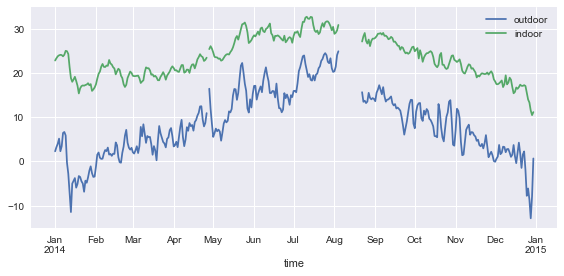

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)
fig.tight_layout()
#fig.savefig("ch12-seaborn-plot.pdf")

In [156]:
#sns.kdeplot(df_temp["outdoor"].dropna().values, shade=True, cumulative=True);

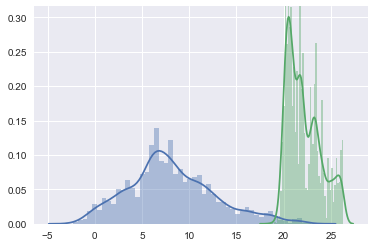

In [157]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

#plt.savefig("ch12-seaborn-distplot.pdf")

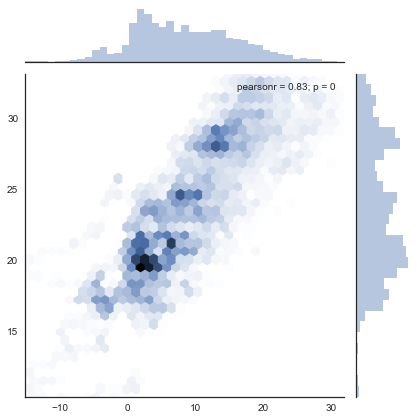

In [158]:
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                  df_temp.resample("H").mean()["indoor"].values, kind="hex");
    
#plt.savefig("ch12-seaborn-jointplot.pdf")

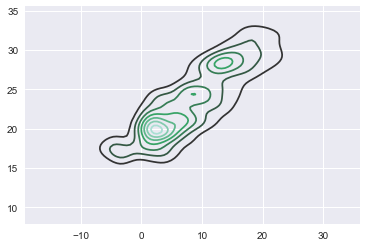

In [159]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
            df_temp.resample("H").mean()["indoor"].dropna().values, shade=False);

#plt.savefig("ch12-seaborn-kdeplot.pdf")

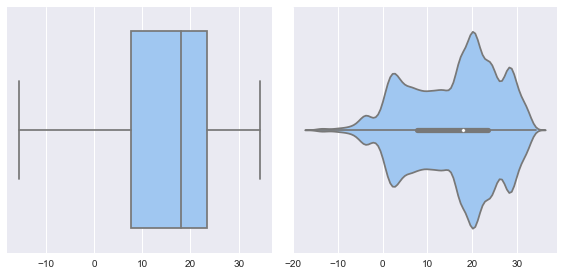

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(df_temp.dropna(), ax=ax2, palette="pastel")

fig.tight_layout()
#fig.savefig("ch12-seaborn-boxplot-violinplot.pdf")

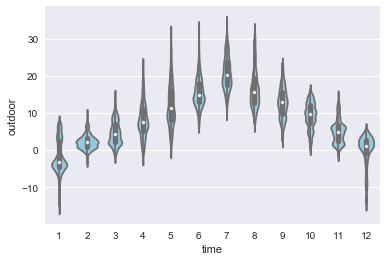

In [161]:
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor, color="skyblue");

#plt.savefig("ch12-seaborn-violinplot.pdf")

In [162]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour

In [163]:
df_temp.head()

,outdoor,indoor,month,hour
time,,,,
2014-01-01 00:00:00+01:00,4.38,21.94,1,0
2014-01-01 00:10:00+01:00,4.25,22.00,1,0
2014-01-01 00:20:00+01:00,4.19,22.00,1,0
2014-01-01 00:30:00+01:00,4.06,22.00,1,0
2014-01-01 00:40:00+01:00,4.06,22.00,1,0


In [164]:
table = pd.pivot_table(df_temp, values='outdoor', index=['month'], columns=['hour'], aggfunc=np.mean)

In [165]:
table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,-1.692312,-1.750162,-1.826649,-1.879086,-1.922527,-1.968065,-2.020914,-2.035806,-2.101774,-2.001022,...,-1.457849,-1.696935,-1.814194,-1.812258,-1.853297,-1.898432,-1.839730,-1.806486,-1.854462,-1.890811
2,1.613690,1.521190,1.479405,1.464371,1.506407,1.485595,1.499167,1.516946,1.669226,2.067725,...,3.573593,3.360741,2.939390,2.501607,2.357425,2.236190,2.204458,2.137619,2.024671,1.896190
3,3.192366,2.866774,2.628000,2.524140,2.384140,2.235538,2.243387,2.622258,3.419301,4.466290,...,7.790323,7.930914,7.595892,6.770914,5.731508,4.983784,4.437419,4.022312,3.657903,3.407258
4,5.832738,5.336012,4.926667,4.597059,4.380000,4.109769,4.123699,4.741437,5.878035,7.272299,...,12.175556,12.500059,12.494483,12.361156,11.989240,10.454881,8.857619,7.712619,6.974762,6.293512
5,9.792204,9.369351,9.009839,8.670914,8.463387,8.446919,8.772324,9.562742,10.723622,12.047717,...,15.542581,15.744624,15.784839,15.799570,17.009892,15.685161,13.632796,12.216290,11.291237,10.622849
6,13.209556,12.792889,12.382889,11.967889,11.735778,11.886667,12.503778,13.338167,14.343444,15.665475,...,18.630556,18.866292,18.680611,18.529832,20.057877,18.853389,16.969777,15.675111,14.658778,13.898167
7,17.956344,17.348641,16.793152,16.309892,16.001559,15.986774,16.506613,17.478226,18.850054,20.533763,...,24.598441,25.030000,24.869194,24.764409,26.155161,24.896505,22.550269,20.882649,19.699022,18.822634
8,14.498205,13.960128,13.555128,12.995641,12.651410,12.485974,12.680130,13.403506,14.578780,16.170833,...,20.473810,20.292381,20.328795,19.642436,19.373846,18.713462,17.034872,15.843590,15.146154,14.596667
9,11.133000,10.725667,10.362444,9.976833,9.729333,9.503944,9.357500,9.689778,10.600778,11.829106,...,16.336983,16.828268,17.031056,16.786983,15.853556,14.534637,13.350444,12.545278,11.954190,11.399056


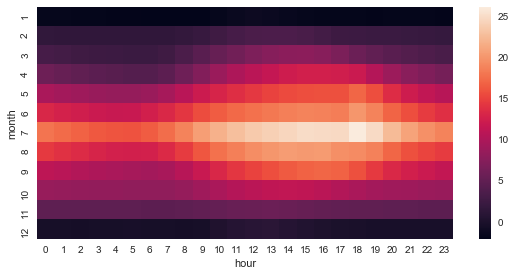

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax);

fig.tight_layout()
#fig.savefig("ch12-seaborn-heatmap.pdf")